In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read the file
df_x = pd.read_csv('eval_x.csv')
# add a column for expert
df_x['expert'] = False
# read the file
df_y = pd.read_csv('eval_xe.csv')
# add a column for expert
df_y['expert'] = True
# concat
df = pd.concat([df_x, df_y])
# save to csv
df.to_csv('eval.csv', index=False)

In [ ]:
# use seaborn to plot
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
# plot
fig, axs = plt.subplots(3, 4, figsize=(40, 20))
sns.lineplot(x='mass_x', y='rew', hue='expert', data=df, ax=axs[0,0], errorbar=('sd', 0.2))
sns.lineplot(x='mass_y', y='rew', hue='expert', data=df, ax=axs[0,1], errorbar=('sd', 0.2))
sns.lineplot(x='mass_z', y='rew', hue='expert', data=df, ax=axs[0,2], errorbar=('sd', 0.2))
sns.lineplot(x='decay_x', y='rew', hue='expert', data=df, ax=axs[1,0], errorbar=('sd', 0.2))
sns.lineplot(x='decay_y', y='rew', hue='expert', data=df, ax=axs[1,1], errorbar=('sd', 0.2))
sns.lineplot(x='decay_z', y='rew', hue='expert', data=df, ax=axs[1,2], errorbar=('sd', 0.2))
sns.lineplot(x='param_0', y='rew', hue='expert', data=df, ax=axs[2,0], errorbar=('sd', 0.2))
sns.lineplot(x='param_1', y='rew', hue='expert', data=df, ax=axs[2,1], errorbar=('sd', 0.2))
sns.lineplot(x='param_2', y='rew', hue='expert', data=df, ax=axs[2,2], errorbar=('sd', 0.2))
sns.lineplot(x='param_3', y='rew', hue='expert', data=df, ax=axs[2,3], errorbar=('sd', 0.2))

In [ ]:
# save the plot
plt.savefig('sensitivity.png')

In [ ]:
df[df['mass_x']==0.006].var()

In [ ]:
import torch
from icecream import ic
# set ic float precision to 3
# vanilla = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_mlp_vanilla_Dw1.pt')
# ic(vanilla['expert_err_x_final'], vanilla['adapt_err_x_initial'], vanilla['adapt_err_x_end'])
# expert_Dw0 = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_mlp_expert_Dw0.pt')
# ic(expert_Dw0['expert_err_x_final'], expert_Dw0['adapt_err_x_initial'], expert_Dw0['adapt_err_x_end'])
expert_Dw1 = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_RMA.pt')
ic(expert_Dw1['expert_err_x_final'], expert_Dw1['adapt_err_x_initial'], expert_Dw1['adapt_err_x_end'])
# expert_Dw1_C4 = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_mlp_expert_Dw1_C4.pt')
# ic(expert_Dw1_C4['expert_err_x_final'], expert_Dw1_C4['adapt_err_x_initial'], expert_Dw1_C4['adapt_err_x_end'])
# print(f"|{vanilla['expert_err_x_final']:.4f}|{vanilla['adapt_err_x_initial']:.4f}|{vanilla['adapt_err_x_end']:.4f}|")
# print(f"|{expert_Dw0['expert_err_x_final']:.4f}|{expert_Dw0['adapt_err_x_initial']:.4f}|{expert_Dw0['adapt_err_x_end']:.4f}|")
print(f"|{expert_Dw1['expert_err_x_final']:.4f}|{expert_Dw1['adapt_err_x_initial']:.4f}|{expert_Dw1['adapt_err_x_end']:.4f}|")

# print(f"|{expert_Dw1_C4['expert_err_x_final']:.4f}|{expert_Dw1_C4['adapt_err_x_initial']:.4f}|{expert_Dw1_C4['adapt_err_x_end']:.4f}|")

In [1]:
# load torch module
import torch
# load the model
model = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_ood-only-disturb-center-100-com3.pt')
compressor = model['compressor'].to('cpu')
err = model['expert_err_x_final']

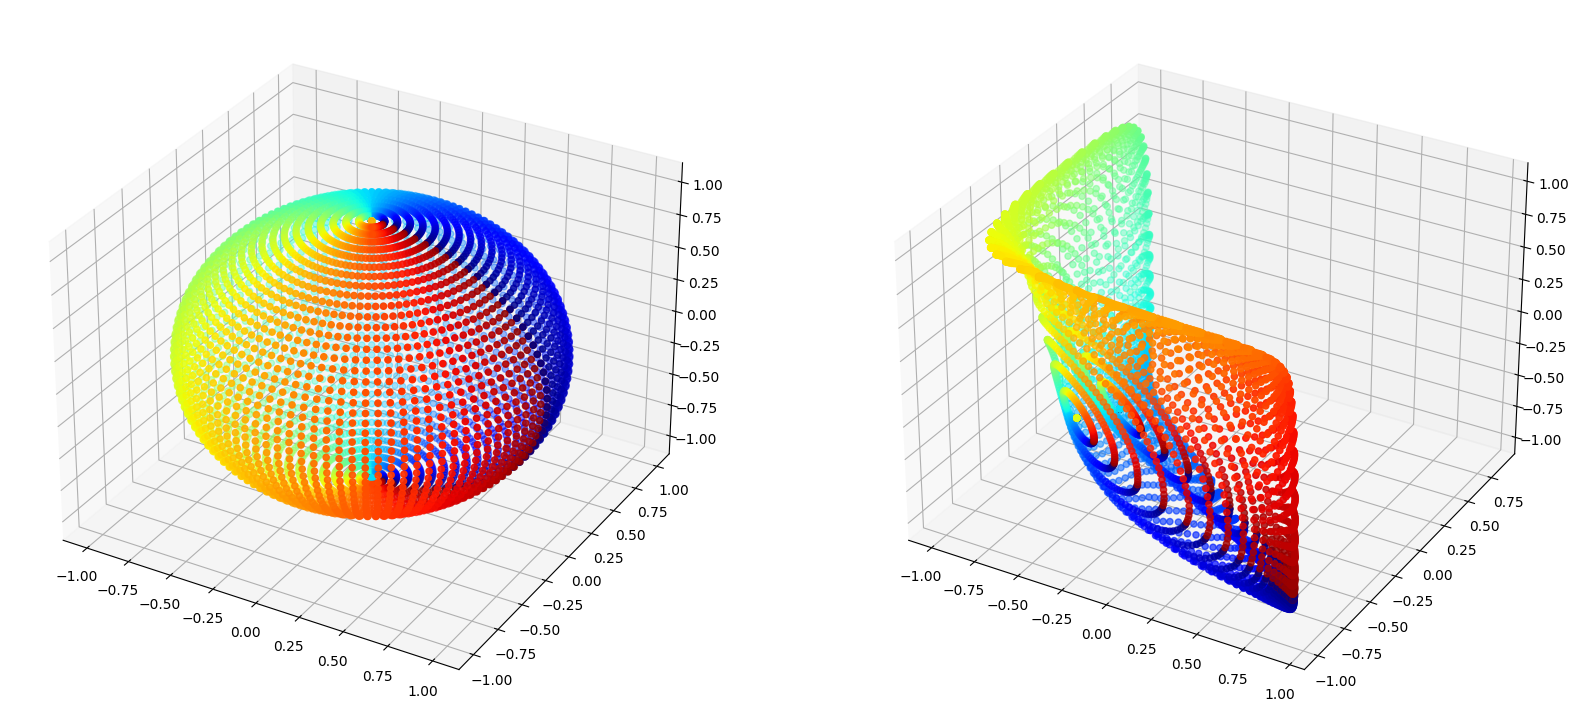

In [6]:
# create xyz from a sphere with torch
theta = torch.linspace(0, 2*torch.pi, 100)
phi = torch.linspace(0, torch.pi, 50)
x = torch.outer(torch.cos(theta), torch.sin(phi))
y = torch.outer(torch.sin(theta), torch.sin(phi))
z = torch.outer(torch.ones(theta.shape), torch.cos(phi))
xyz = torch.stack([x, y, z], dim=-1).reshape(-1, 3)
# passing xyz to network
xyz = xyz.to('cpu')
xyz_compressed = compressor(xyz)
err = torch.arange(5000)/5000
# plot orginal xyz and compressed xyz side by side with color mapping
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=err, cmap='jet')
ax2.scatter(xyz_compressed[:, 0], xyz_compressed[:, 1], xyz_compressed[:, 2], c=err, cmap='jet')